In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
df=pd.read_csv("prodigy 1 dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
columns_to_drop = ["Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df.drop(columns = columns_to_drop, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 16.5+ KB


In [8]:
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows.count()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [9]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.isnull().sum())

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
dtype: int64

In [10]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 16.5+ KB


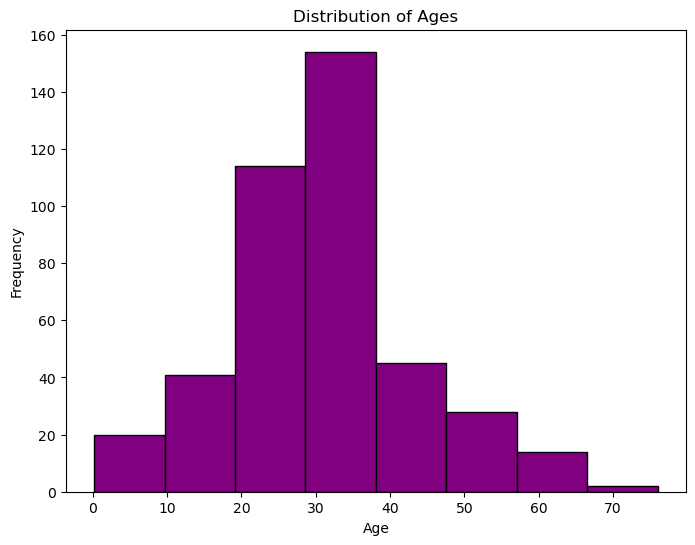

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=8, color='purple', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


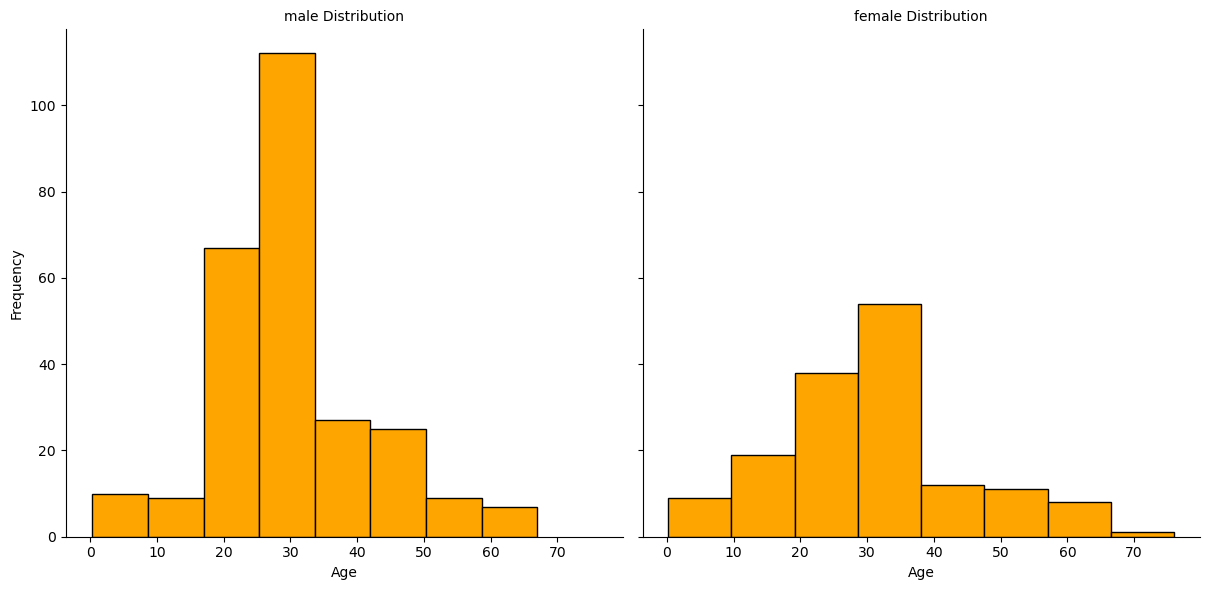

In [13]:
# Create a FacetGrid for a grouped histogram
g = sns.FacetGrid(df, col='Sex', height=6, aspect=1)
g.map(plt.hist, 'Age', bins=8, color='orange', edgecolor='black')

# Add titles and labels
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='{col_name} Distribution')
plt.show()

In [14]:
gender_counts = df['Sex'].value_counts()
gender_counts

Sex
male      266
female    152
Name: count, dtype: int64

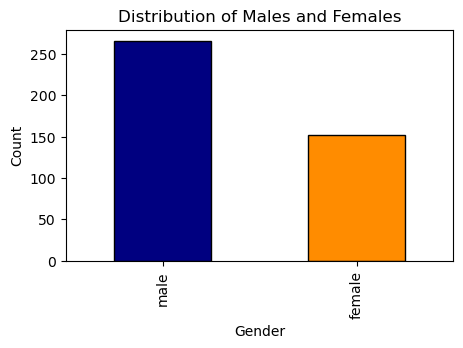

In [15]:
plt.figure(figsize=(5, 3))
gender_counts.plot(kind='bar', color=['navy', 'darkorange'], edgecolor='black')
plt.title('Distribution of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()